# PCA 範例
* 以 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [5]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=10000, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

> Answer: 
>
>   1. Best score 仍然出現在 components=30, 但是 alpha = 0.0001
>   2. 結果沒有較好, 原本 (penalty = 'l1', max_iterm = '100') 的 Best Score = 0.918, 現在 (penalty = 'l1', max_iterm = '100') 是 0.916

In [8]:
# 執行 GridSearchCV 跑出最佳參數


# Note: Pipeline 的特殊用法 "__" 是 delimiter
#    pca__n_components => Apply "n_components" to "pca"
#    logistic__alpha => Apply "alpha" to "logistic"
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}

'''
sklearn.model_selection.GridSearchCV

    Exhaustive search over specified parameter values for an estimator
    
    Important members are fit, predict.

    GridSearchCV implements a “fit” and a “score” method. 
    It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” 
    if they are implemented in the estimator used.
    
    param_grid : dict or list of dictionaries
        Dictionary with parameters names (string) as keys and lists of parameter settings to try as values, 
        or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. 
        This enables searching over any sequence of parameter settings.
    
'''

search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.916):
{'logistic__alpha': 0.01, 'pca__n_components': 30}


pca.explained_variance_ratio_.shape=(64,)
results.shape = (35, 15)
results.head() =    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.091569      0.013653         0.000604        0.001208   
1       0.084738      0.020156         0.000000        0.000000   
2       0.089095      0.011494         0.000000        0.000000   
3       0.118894      0.009902         0.000399        0.000489   
4       0.147407      0.019958         0.000599        0.000489   
5       0.196946      0.030653         0.001200        0.000398   
6       0.180330      0.024150         0.000000        0.000000   
7       0.558705      0.444117         0.000000        0.000000   
8       0.183804      0.208897         0.000000        0.000000   
9       0.085708      0.014210         0.000000        0.000000   

  param_logistic__alpha param_pca__n_components  \
0                0.0001                       4   
1                0.0001                      10   
2                0.0001  

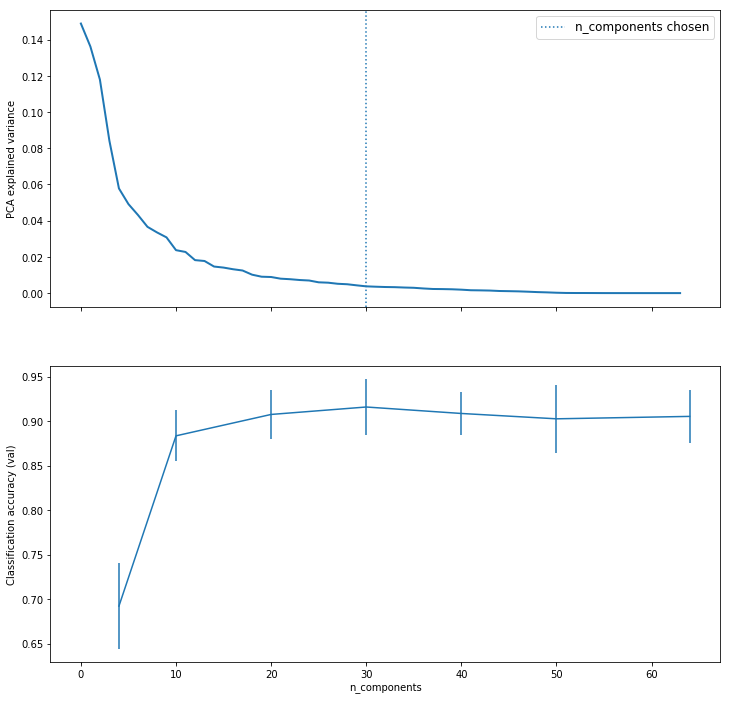

In [9]:
# 繪製不同 components 的 PCA explained variance ratio
pca.fit(X_digits)

# Erwin:
#    sharex: means share x coordinate and labels
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 12))

'''
Draw ax0
'''

print(f'pca.explained_variance_ratio_.shape={pca.explained_variance_ratio_.shape}')
# print(f'pca.explained_variance_ratio_={pca.explained_variance_ratio_}')

# explained_variance_ratio_: Percentage of variance explained by each of the selected components.
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')
ax1.set_xlabel('n_components')

# axvline : draw vertical line
ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

'''
Draw ax1
'''


# 繪製 7 個不同採樣點的 accuracy
results = pd.DataFrame(search.cv_results_)
print(f'results.shape = {results.shape}')
print(f'results.head() = {results.head(10)}')
components_col = 'param_pca__n_components'

'''
pandas.DataFrame.nlargest

    DataFrame.nlargest(n, columns, keep='first')
    
    Return the first n rows ordered by columns in descending order.
'''
# Return an Dataframe:  
#    Grouped by components_col (or 'param_pca__n_components',  or 4,10,20, ...)
#    Sort and Pick the largest y='mean_test_score'
#    Returning the dataframe is
#        x: 7 rows ('param_pca__n_components')
#        y: 15 columns (all columns from GridSearchCV)
best_clfs = results.groupby(components_col).apply(lambda d: d.nlargest(1, 'mean_test_score'))
print(f'type(best_clfs) = {type(best_clfs)}')
print(f'best_clfs.shape = {best_clfs.shape}')

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
# plt.tight_layout()

plt.show()
